<a href="https://colab.research.google.com/github/TirthankarDasThakur/python_fundamentals_b55/blob/main/exploratory_analysis_with_seaborn_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Telecom Customer Churn prediction**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
sns.set(style="white")

**Data Collection**

In [2]:
#loading the dataset in pandas
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
#check first five rows of the dataset
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
#check last five rows of the dataset
data.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [6]:
#check shape of the dataset
data.shape

(7043, 21)

In [7]:
#check describe of the dataset
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [8]:
#check corr reationship of the dataset
data.corr()

,SeniorCitizen,tenure,MonthlyCharges
SeniorCitizen,1.000000,0.016567,0.220173
tenure,0.016567,1.000000,0.247900
MonthlyCharges,0.220173,0.247900,1.000000


In [9]:
#check basic infomtion of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [10]:
#check missing value of the dataset
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

**EDA of the Dataset**

In [11]:
data['gender'].value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

<Axes: ylabel='gender'>

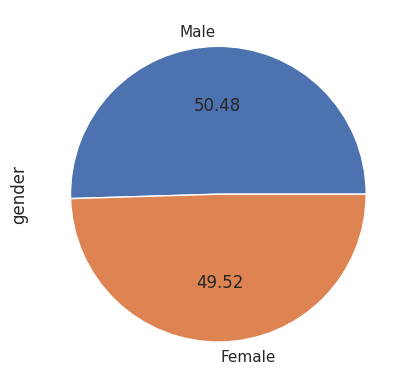

In [12]:
data['gender'].value_counts().plot(kind='pie',autopct='%.2f')

<Axes: xlabel='SeniorCitizen', ylabel='Density'>

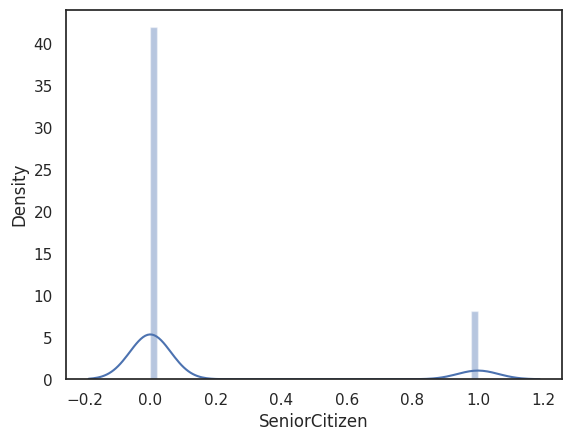

In [13]:
sns.distplot(data['SeniorCitizen'])

In [14]:
data['Partner'].value_counts()

No     3641
Yes    3402
Name: Partner, dtype: int64

<Axes: ylabel='Partner'>

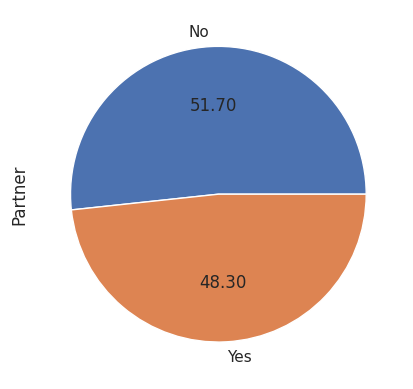

In [15]:
data['Partner'].value_counts().plot(kind='pie',autopct='%.2f')

In [16]:
data['Dependents'].value_counts()

No     4933
Yes    2110
Name: Dependents, dtype: int64

<Axes: ylabel='Dependents'>

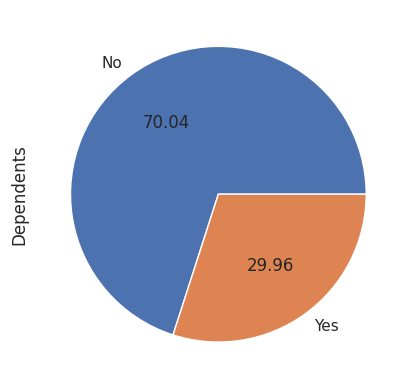

In [17]:
data['Dependents'].value_counts().plot(kind='pie',autopct='%.2f')

In [18]:
data['PhoneService'].value_counts()

Yes    6361
No      682
Name: PhoneService, dtype: int64

<Axes: ylabel='PhoneService'>

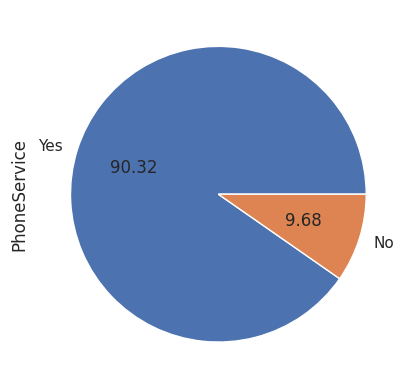

In [19]:
data['PhoneService'].value_counts().plot(kind='pie',autopct='%.2f')

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [22]:
data['TotalCharges'] = data['TotalCharges'].replace(" ", 0).astype(float)

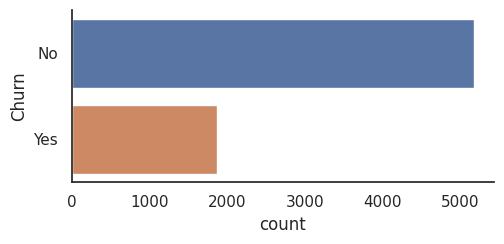

In [23]:
ax = sns.catplot(y="Churn", kind="count", data=data, height=2.6, aspect=2)

**Numerical features**

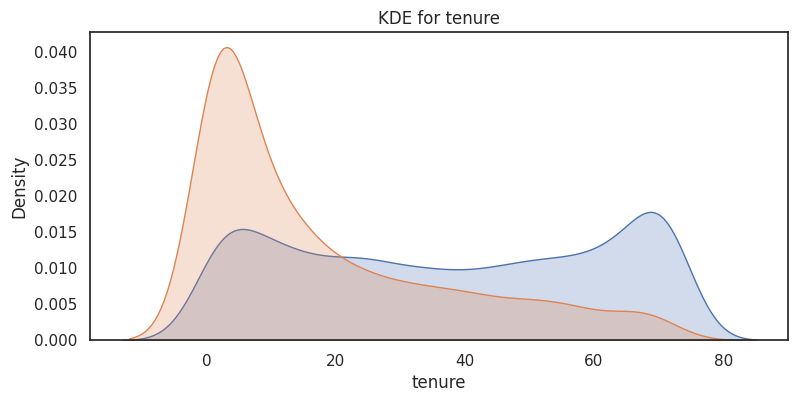

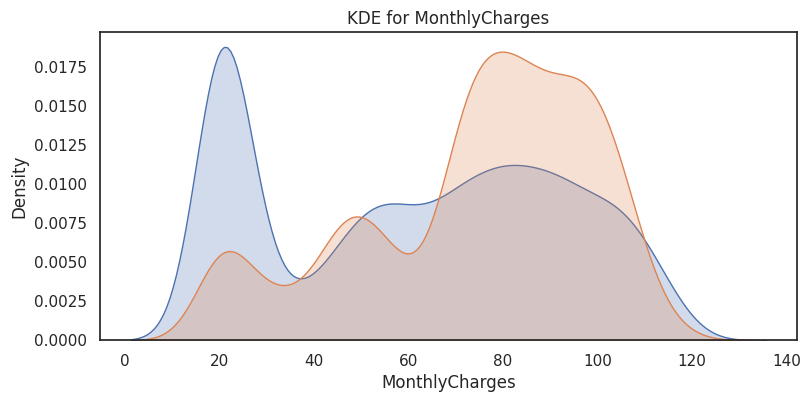

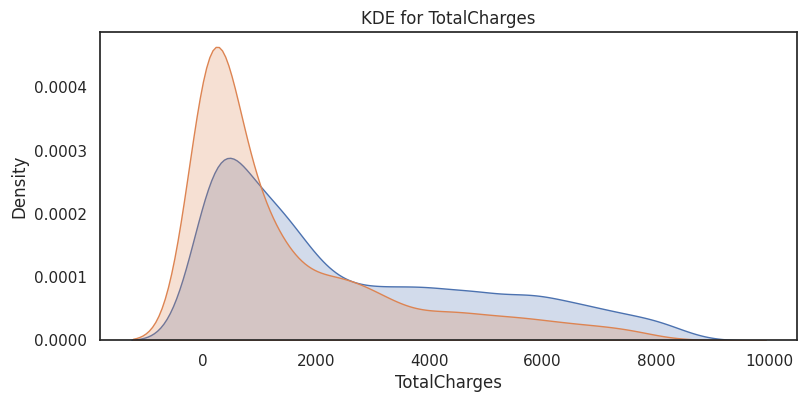

In [25]:
def kdeplot(feature):
    plt.figure(figsize=(9, 4))
    plt.title("KDE for {}".format(feature))
    ax0 = sns.kdeplot(data[data['Churn'] == 'No'][feature].dropna(), shade=True, label='Churn: No')
    ax1 = sns.kdeplot(data[data['Churn'] == 'Yes'][feature].dropna(), shade=True, label='Churn: Yes')

kdeplot('tenure')
kdeplot('MonthlyCharges')
kdeplot('TotalCharges')
plt.show()

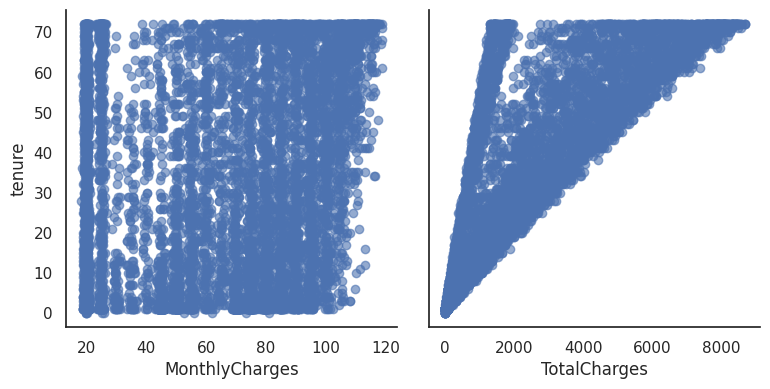

In [27]:
g = sns.PairGrid(data, y_vars=["tenure"], x_vars=["MonthlyCharges", "TotalCharges"], height=4)
ax = g.map(plt.scatter, alpha=0.6)

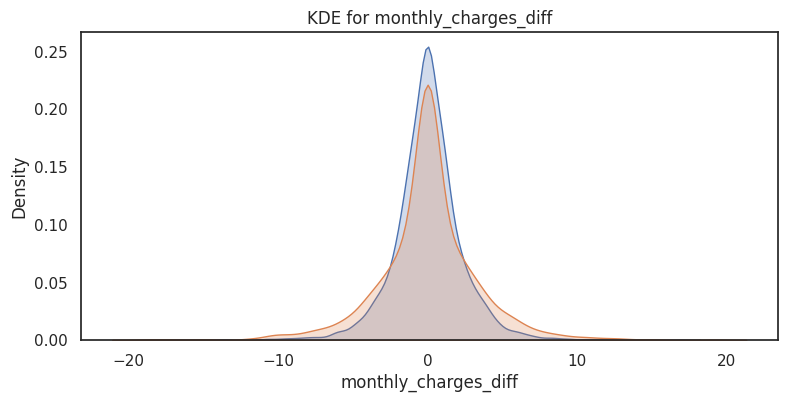

In [28]:
# Calculate features
data['total_charges_to_tenure_ratio'] = data['TotalCharges'] / data['tenure']
data['monthly_charges_diff'] = data['MonthlyCharges'] - data['total_charges_to_tenure_ratio']

kdeplot('monthly_charges_diff')

**Categorical features**


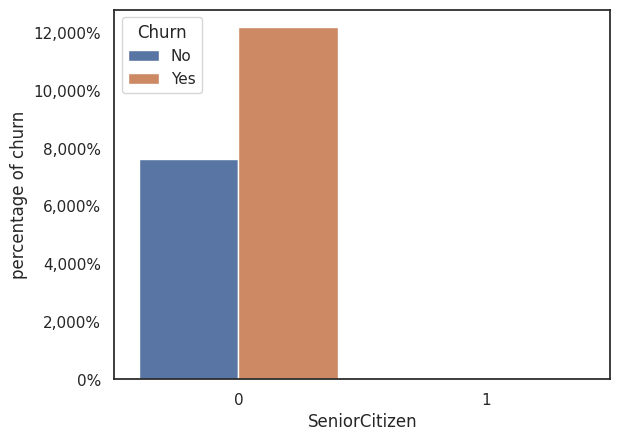

In [31]:
def barplot_percentages(feature, orient='v', axis_name="percentage of customers"):
    ratios = pd.DataFrame()
    g = data.groupby(feature)["Churn"].value_counts().to_frame()
    g = g.rename({"Churn": axis_name, "Churn": "total"}, axis=1).reset_index()
    g["total"] = g["total"]/len(data)
    g["percentage of churn"] = g["total"]/g.groupby(feature)["total"].sum()*100

    if orient == 'v':
        ax = sns.barplot(x=feature, y="percentage of churn", hue='Churn', data=g)
        ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])
    else:
        ax = sns.barplot(x="percentage of churn", y=feature, hue='Churn', data=g)
        ax.set_xticklabels(['{:,.0%}'.format(x) for x in ax.get_xticks()])
    
    plt.show()

barplot_percentages("SeniorCitizen")

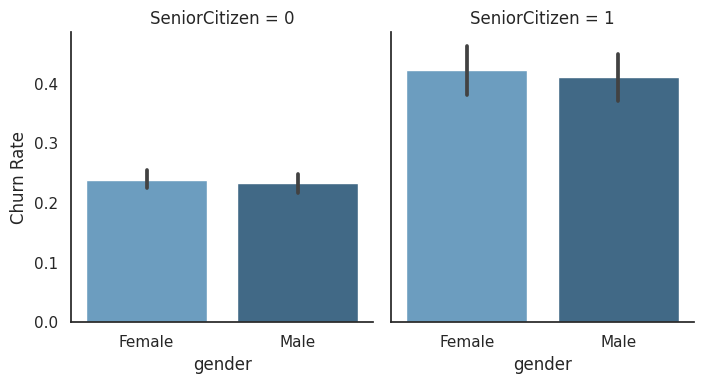

In [32]:
data['churn_rate'] = data['Churn'].replace("No", 0).replace("Yes", 1)

g = sns.FacetGrid(data, col="SeniorCitizen", height=4, aspect=.9)
ax = g.map(sns.barplot, "gender", "churn_rate", palette="Blues_d", order=["Female", "Male"])
ax.set_ylabels("Churn Rate")
plt.show()

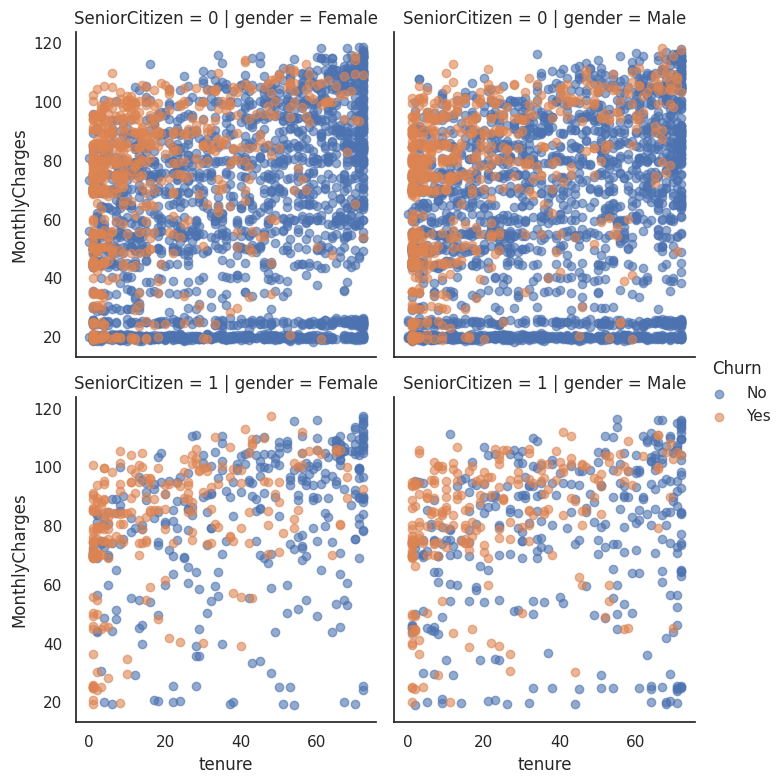

In [33]:
g = sns.FacetGrid(data, row='SeniorCitizen', col="gender", hue="Churn", height=4, aspect=.9)
g.map(plt.scatter, "tenure", "MonthlyCharges", alpha=0.6)
g.add_legend()
plt.show()

**Partner and dependents**

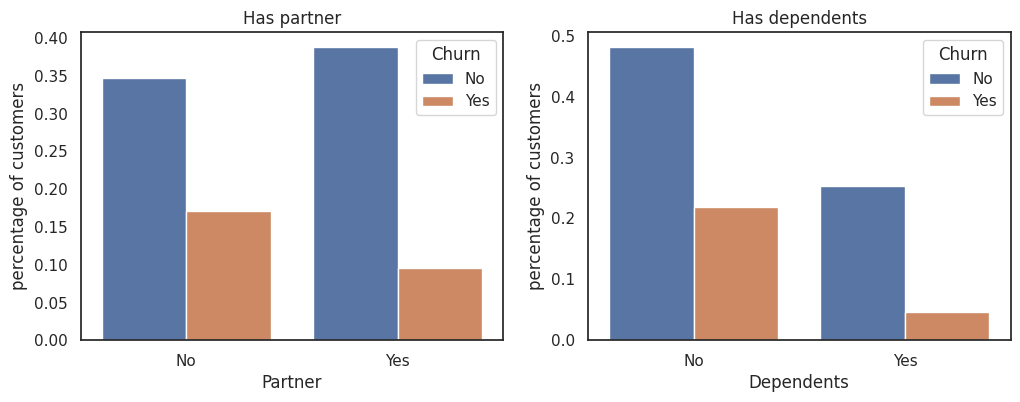

In [39]:
fig, axis = plt.subplots(1, 2, figsize=(12,4))
axis[0].set_title("Has partner")
axis[1].set_title("Has dependents")
axis_y = "percentage of customers"
# Plot Partner column
gp_partner = data.groupby('Partner')["Churn"].value_counts()/len(data)
gp_partner = gp_partner.to_frame().rename({"Churn": axis_y}, axis=1).reset_index()
ax = sns.barplot(x='Partner', y= axis_y, hue='Churn', data=gp_partner, ax=axis[0])
# Plot Dependents column
gp_dep = data.groupby('Dependents')["Churn"].value_counts()/len(data)
gp_dep = gp_dep.to_frame().rename({"Churn": axis_y}, axis=1).reset_index()
ax = sns.barplot(x='Dependents', y= axis_y, hue='Churn', data=gp_dep, ax=axis[1])
plt.show()  

**Phone and Internet services**

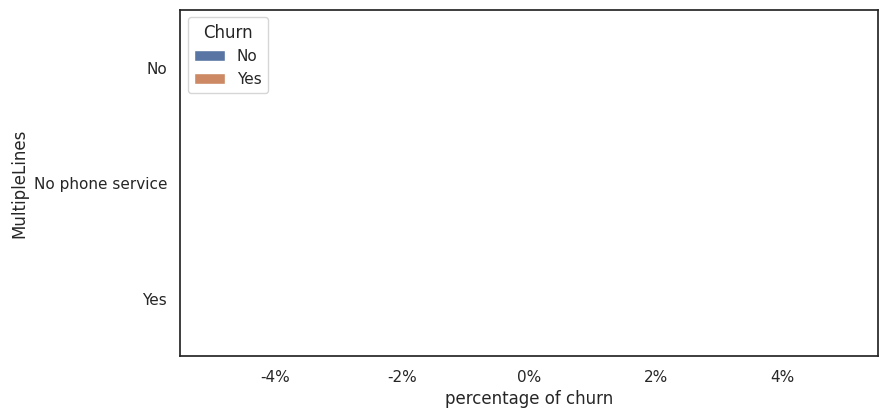

In [40]:
plt.figure(figsize=(9, 4.5))
barplot_percentages("MultipleLines", orient='h')

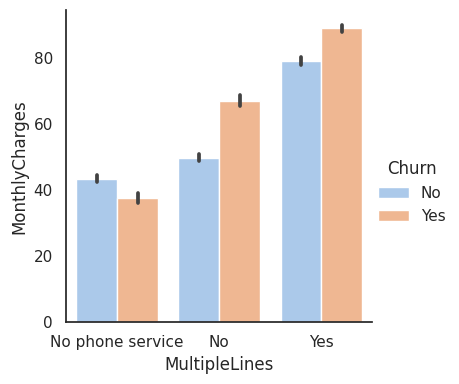

In [42]:
ax = sns.catplot(x="MultipleLines", y="MonthlyCharges", hue="Churn", dodge=True,
                 palette="pastel", kind="bar", data=data, height=4)

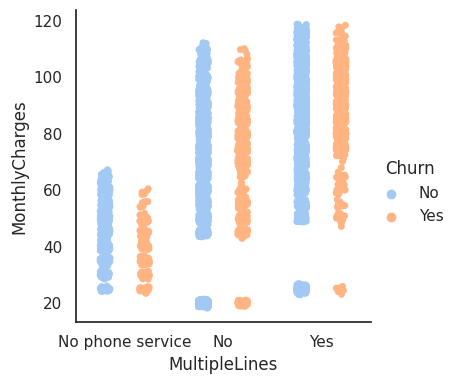

In [45]:
sns.catplot(x="MultipleLines", y="MonthlyCharges", hue="Churn",
            dodge=True, palette="pastel", data=data, height=4)

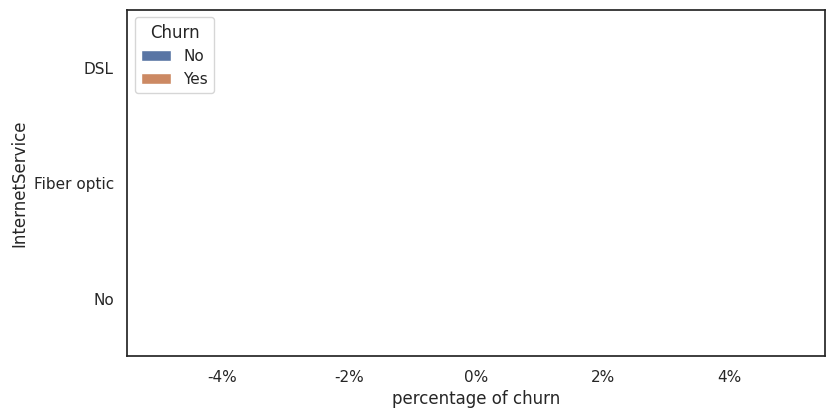

In [48]:
plt.figure(figsize=(9, 4.5))
barplot_percentages("InternetService", orient="h")

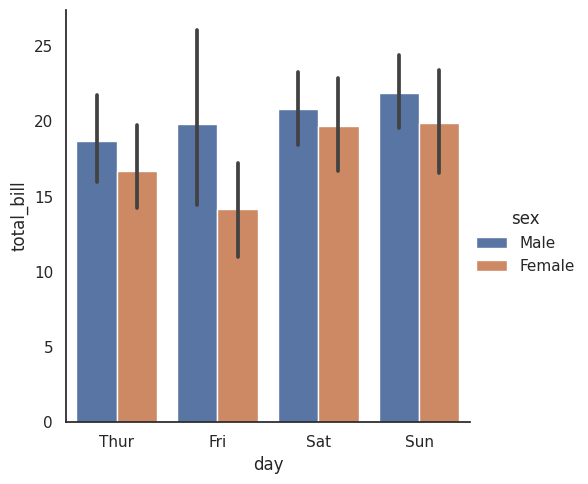

In [52]:
import seaborn as sns

# Load example dataset
tips = sns.load_dataset("tips")

# Plot a bar chart
sns.catplot(x="day", y="total_bill", hue="sex", kind="bar", data=tips)

AttributeError: ignored

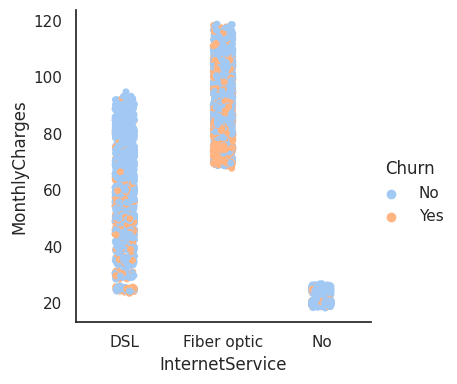

In [53]:
ax = sns.catplot(x="InternetService", y="MonthlyCharges", hue="Churn",
                 palette="pastel", data=data, height=4)
ax = sns.barplot(x="InternetService", y="MonthlyCharges", hue="Churn",
                 data=data, estimator=np.mean, ci=None, ax=ax)

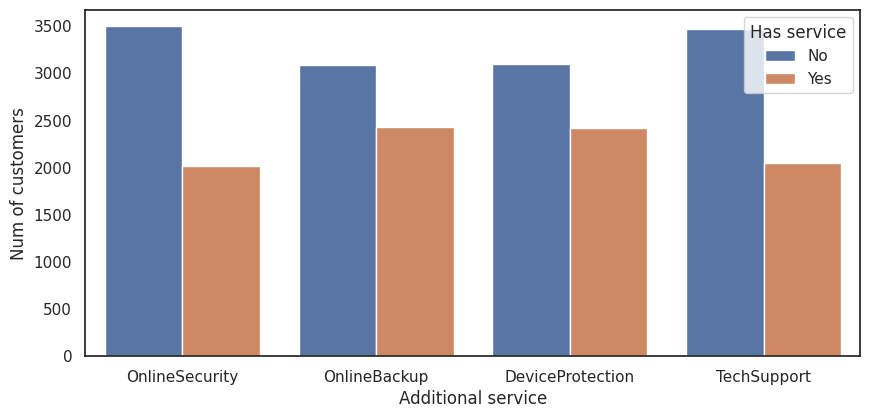

In [54]:
cols = ["OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport"]
df1 = pd.melt(data[data["InternetService"] != "No"][cols]).rename({
    'value': 'Has service'
}, axis=1)
plt.figure(figsize=(10, 4.5))
ax = sns.countplot(data=df1, x='variable', hue='Has service')
ax.set(xlabel='Additional service', ylabel='Num of customers')
plt.show()

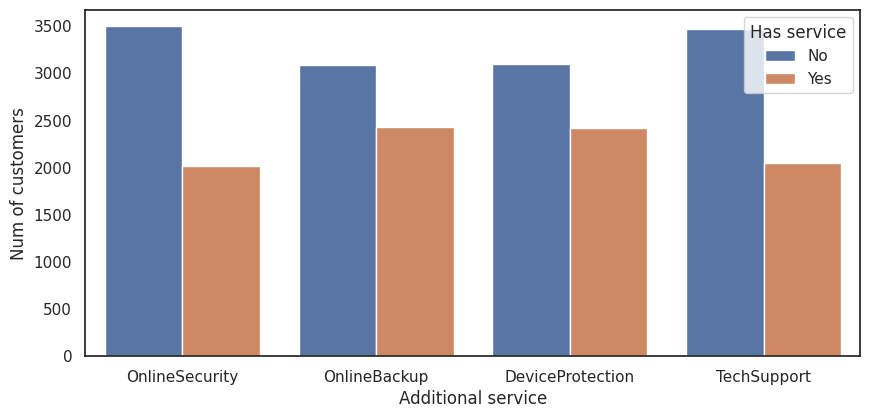

In [55]:
cols = ["OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport"]
df1 = pd.melt(data[data["InternetService"] != "No"][cols]).rename({
    'value': 'Has service'
}, axis=1)
plt.figure(figsize=(10, 4.5))
ax = sns.countplot(data=df1, x='variable', hue='Has service')
ax.set(xlabel='Additional service', ylabel='Num of customers')
plt.show()

**Contract and Payment**

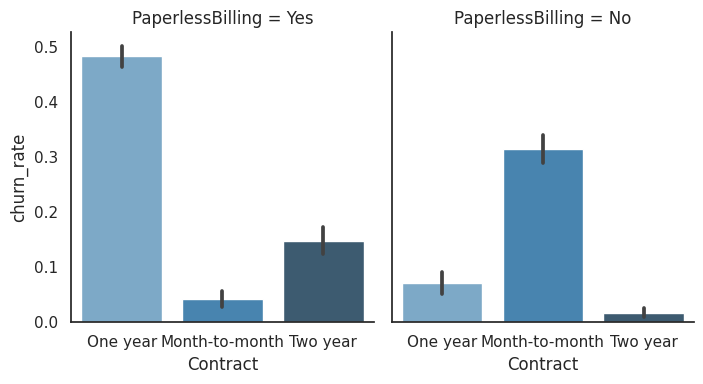

In [56]:
g = sns.FacetGrid(data, col="PaperlessBilling", height=4, aspect=.9)
ax = g.map(sns.barplot, "Contract", "churn_rate", palette = "Blues_d")

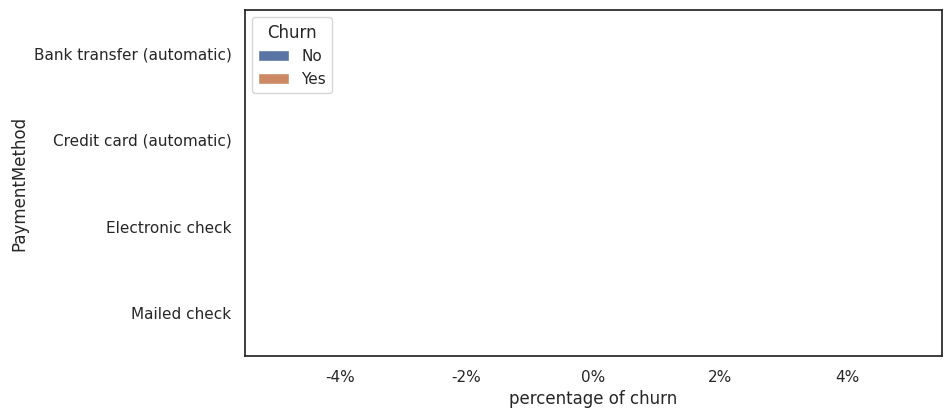

In [57]:
plt.figure(figsize=(9, 4.5))
barplot_percentages("PaymentMethod", orient='h')

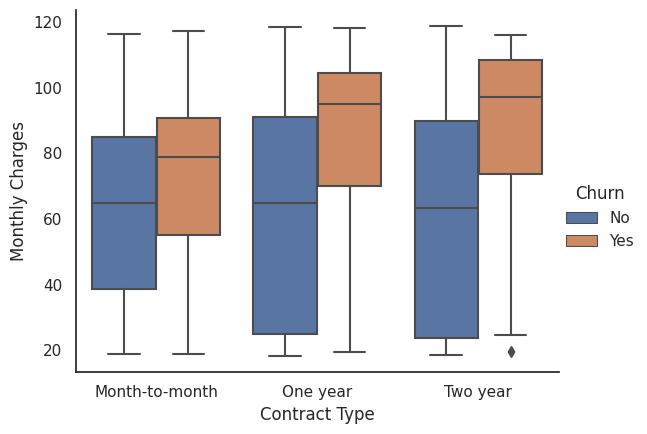

In [58]:
ax = sns.catplot(x="Contract", y="MonthlyCharges", hue="Churn", kind="box", data=data, height=4.5, aspect=1.3)
ax.set(xlabel='Contract Type', ylabel='Monthly Charges')
plt.show()

**Correlation between features**

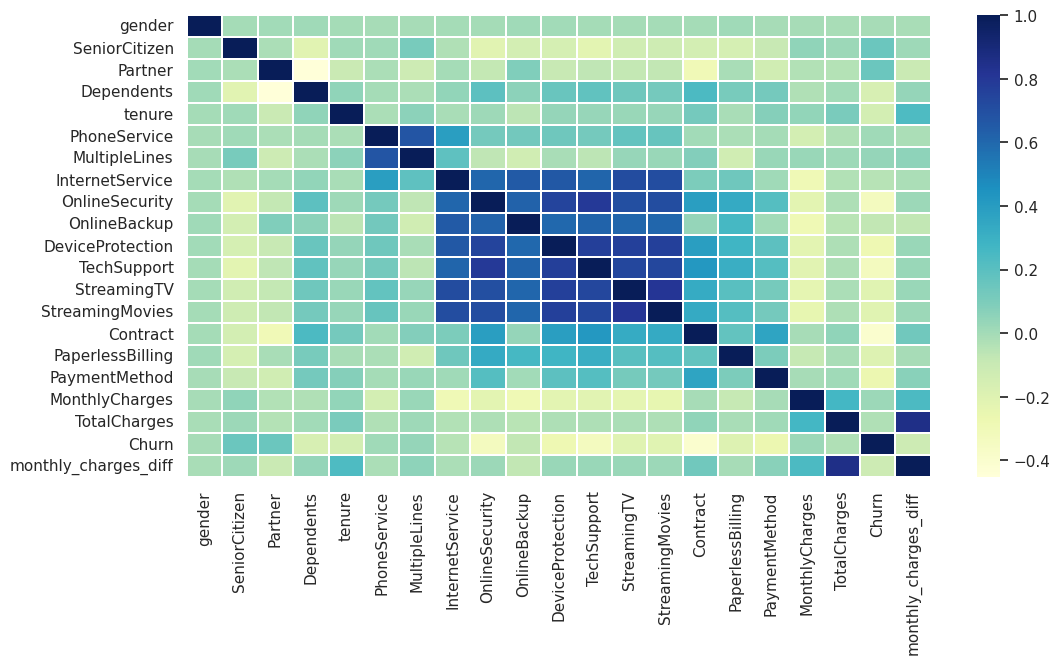

In [65]:
plt.figure(figsize=(12, 6))
data.drop(['customerID', 'churn_rate', 'total_charges_to_tenure_ratio'], axis=1, inplace=True)
corr = data.apply(lambda x: pd.factorize(x)[0]).corr()
ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, linewidths=.2, cmap="YlGnBu")


**Feature Importance**

In [68]:
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline

# One-hot encode the data
df = pd.get_dummies(data)

# Drop redundant columns (for features with two unique values)
drop = ['Churn_Yes', 'Churn_No', 'gender_Female', 'Partner_No',
        'Dependents_No', 'PhoneService_No', 'PaperlessBilling_No']
x, y = df.drop(drop, axis=1), df['Churn_Yes']

# Create a pipeline that imputes missing values and trains the classifier
pipeline = make_pipeline(SimpleImputer(strategy='mean'), 
                         RandomForestClassifier(**params))
pipeline.fit(x, y)

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=6, n_estimators=5000,
                                        n_jobs=4, random_state=0))])

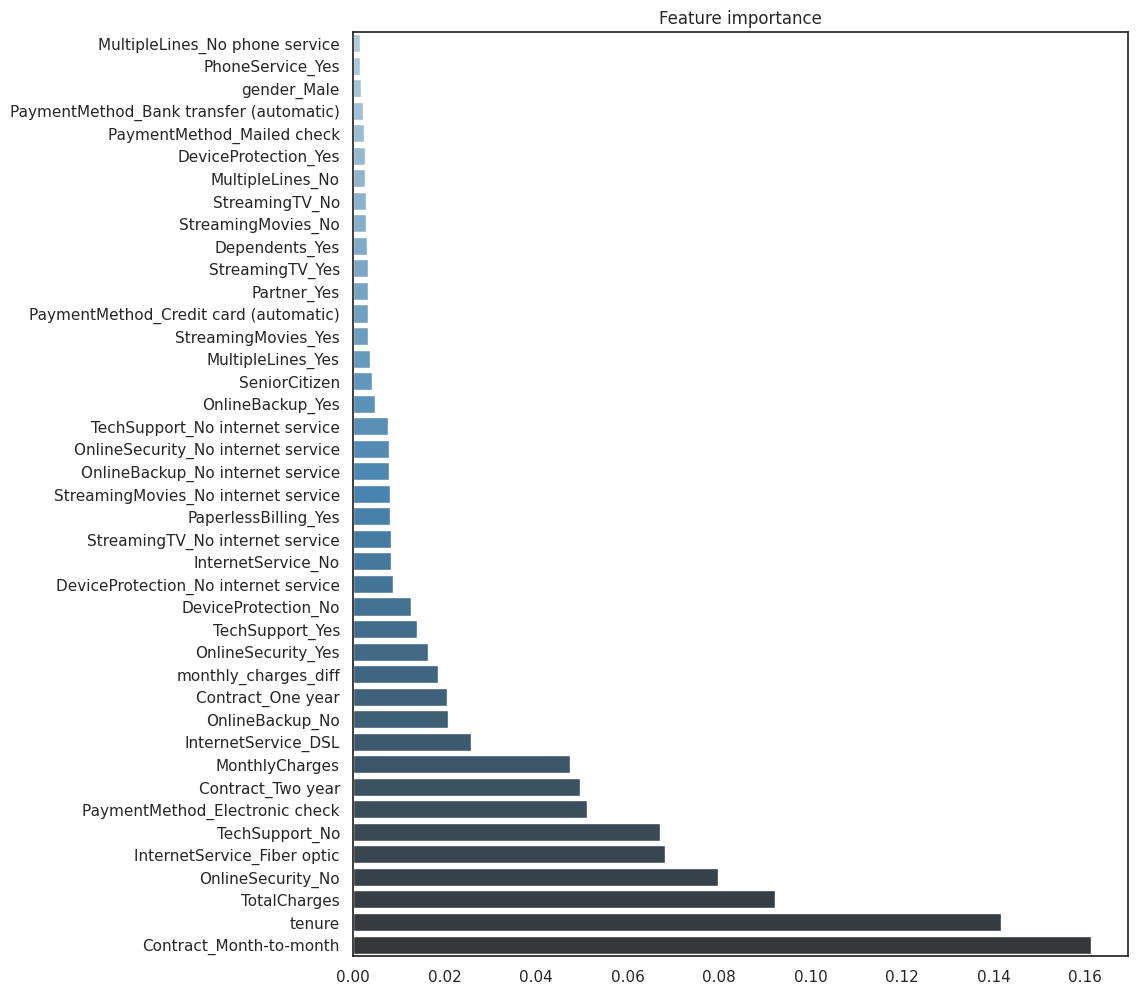

In [70]:
from sklearn.impute import SimpleImputer

# Replace missing values with the median of each column
imputer = SimpleImputer(strategy='median')
x_imputed = imputer.fit_transform(x)

# Fit RandomForest Classifier
clf = RandomForestClassifier(**params)
clf = clf.fit(x_imputed, y)

# Plot features importances
imp = pd.Series(data=clf.feature_importances_, index=x.columns).sort_values()
plt.figure(figsize=(10,12))
plt.title("Feature importance")
ax = sns.barplot(y=imp.index, x=imp.values, palette="Blues_d", orient='h')
plt.show()